### Goal
#### Predict the right medicine for new patient

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
patient_df = pd.read_csv("./datasets/drug200.csv")
patient_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [18]:
# Understanding the data
print(patient_df.columns)
# patient_df.hist(column="Age", bins=100)
print(patient_df.info())
print(patient_df.describe())

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [67]:
# Pre Processing the data
from sklearn import preprocessing

# print(patient_df.head())
print(patient_df["Sex"].unique())
print(patient_df["Cholesterol"].unique())
print(patient_df["Drug"].unique())

x = patient_df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].copy()
y = patient_df[['Drug']].copy()
print(x.head())
# print(y.head())

# Sex Transformation :)
le = preprocessing.LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])

# BP Transformation
x["BP"] = le.fit_transform(x['BP'])
x["Cholesterol"] = le.fit_transform(x['Cholesterol'])

# y['Drug'] = le.fit_transform(y['Drug'])
print(x.head())
print(y['Drug'].unique())
print(x['Cholesterol'].unique())

['F' 'M']
['HIGH' 'NORMAL']
['drugY' 'drugC' 'drugX' 'drugA' 'drugB']
   Age Sex      BP Cholesterol  Na_to_K
0   23   F    HIGH        HIGH   25.355
1   47   M     LOW        HIGH   13.093
2   47   M     LOW        HIGH   10.114
3   28   F  NORMAL        HIGH    7.798
4   61   F     LOW        HIGH   18.043
   Age  Sex  BP  Cholesterol  Na_to_K
0   23    0   0            0   25.355
1   47    1   1            0   13.093
2   47    1   1            0   10.114
3   28    0   2            0    7.798
4   61    0   1            0   18.043
['drugY' 'drugC' 'drugX' 'drugA' 'drugB']
[0 1]


In [68]:
# split the train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print(f"x_train: {x_train.shape} y_train: {x_test.shape}")

x_train: (160, 5) y_train: (40, 5)


In [69]:
# Train and Test model
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth= 4)

dec_tree.fit(x_train, y_train)
pred = dec_tree.predict(x_test)
print(pred[0:5])

['drugY' 'drugX' 'drugY' 'drugX' 'drugY']


In [71]:
# Evaluating the model
from sklearn import metrics

print(f"Accuracy of the model: {metrics.accuracy_score(y_test, pred)}")

Accuracy of the model: 1.0


x_train shape: (160, 5) y_train shape: (160, 1)
['drugY' 'drugC' 'drugB' 'drugX' 'drugA']


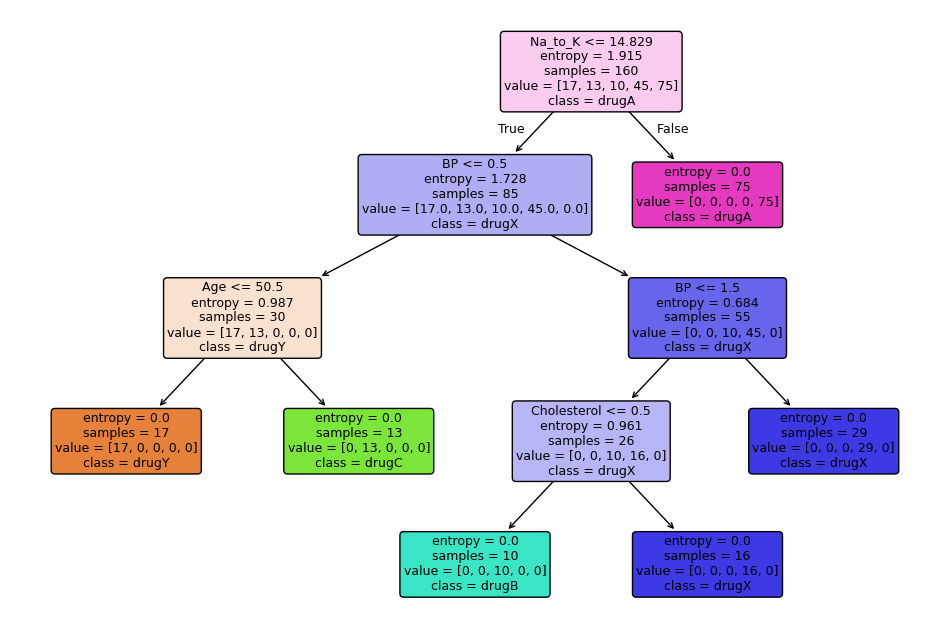

In [96]:
from sklearn.tree import plot_tree
print(f"x_train shape: {x_train.shape} y_train shape: {y_train.shape}")
#plotting the decision tree graph
plt.figure(figsize=(12, 8))
print(y_train['Drug'].unique())
plot_tree(dec_tree,
          feature_names=x_train.columns.tolist(),
          class_names=y_train['Drug'].unique(),
          filled=True,
          rounded=True)
plt.show()


In [ ]:
# Summary

# Made the medicine prediction
# learned how decision trees works
# Train and test the data
# Evaluated the model
# Learned to plot the decision tree graph